# Technical Lesson: Combining, Aggregating, and Reshaping `pandas` DataFrames

In [1]:
# Imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

1. First, we load in the Animal Center outcomes data and inspect the head. Let's also parse 'DateTime' and 'Date of Birth'. There's an option to automatically do this using the `parse_dates` keyword argument.

In [4]:
outcomes = pd.read_csv('data/Austin_Animal_Center_Outcomes_022822.csv',
                       parse_dates=['DateTime', 'Date of Birth'])
outcomes.head()

C:\Users\Praveen\AppData\Local\Temp\ipykernel_16868\830884134.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outcomes = pd.read_csv('data/Austin_Animal_Center_Outcomes_022822.csv',


,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A794011,Chunk,2019-05-08 18:20:00,May 2019,2017-05-02,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
1,A776359,Gizmo,2018-07-18 16:02:00,Jul 2018,2017-07-12,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
2,A821648,NaN,2020-08-16 11:38:00,Aug 2020,2019-08-16,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
3,A720371,Moose,2016-02-13 17:59:00,Feb 2016,2015-10-08,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
4,A674754,NaN,2014-03-18 11:47:00,Mar 2014,2014-03-12,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby


2. We can also load in the intake data, parsing any DateTime columns. Let's then inspect the head:

In [5]:
# Read in the intakes data
intakes = pd.read_csv("data/Austin_Animal_Center_Intakes_022822.csv",
                      parse_dates=['DateTime'])
# Check it out
intakes.head()

C:\Users\Praveen\AppData\Local\Temp\ipykernel_16868\2671916070.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  intakes = pd.read_csv("data/Austin_Animal_Center_Intakes_022822.csv",


,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,2019-01-03 16:19:00,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,2015-07-05 12:59:00,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,2016-04-14 18:43:00,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,2013-10-21 07:59:00,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A682524,Rio,2014-06-29 10:38:00,June 2014,800 Grove Blvd in Austin (TX),Stray,Normal,Dog,Neutered Male,4 years,Doberman Pinsch/Australian Cattle Dog,Tan/Gray


3. It is a good idea to check for duplicate entries in each Dataframe and remove them before executing a merge. If you don't do this, you might end up with a very large combined DataFrame whose size is bloated by many combinations of duplicates from the source DataFrames. For both the outcome and intake DataFrame, the `Animal ID` column is a unique identifier. 

3a. Let's count the rows with duplicate `Animal IDs` from outcomes and then remove them.

In [7]:
# count those duplicates
outcomes.duplicated(subset=['Animal ID']).sum()

14510

In [8]:
# remove those duplicates
outcomes = outcomes.drop_duplicates(subset=['Animal ID'])

3b. Let's count the rows with duplicate `Animal IDs` from intakes and then remove them.

In [9]:
# count those duplicates

intakes.duplicated(subset=['Animal ID']).sum()

14519

In [10]:
# remove those duplicates
intakes = intakes.drop_duplicates(subset=['Animal ID'])

4. Merge the two datasets. Here, let's keep information for animals showing up in both the intake and outcomes records:
- We will thus use an inner join.
- Notice that there are columns, other than the key were are joining on, that are common to both (e.g. Breed, color, DateTime). DateTime will mean different things in each dataset. Thus issue suffixes to '_outcomes' and '_intakes' for identically named columns coming from the respective datasets so that we can distinguish which dataset the column came from. 

Get the info of the combined DataFrame.

In [13]:
combined_df = pd.merge(intakes, outcomes, on = 'Animal ID', how = 'inner', suffixes=['_intakes', '_outcomes'])
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121773 entries, 0 to 121772
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Animal ID             121773 non-null  object        
 1   Name_intakes          81247 non-null   object        
 2   DateTime_intakes      121773 non-null  datetime64[ns]
 3   MonthYear_intakes     121773 non-null  object        
 4   Found Location        121773 non-null  object        
 5   Intake Type           121773 non-null  object        
 6   Intake Condition      121773 non-null  object        
 7   Animal Type_intakes   121773 non-null  object        
 8   Sex upon Intake       121772 non-null  object        
 9   Age upon Intake       121773 non-null  object        
 10  Breed_intakes         121773 non-null  object        
 11  Color_intakes         121773 non-null  object        
 12  Name_outcomes         81247 non-null   object        
 13 

6. Let's use datetime information to create a column call 'Age at Outcome'. Make sure this is in units of days:

In [ ]:
# Let's create our Age at Outcome column
combined_df['Age at Outcome'] = (combined_df['DateTime_outcomes'] - combined_df['Date of Birth']).dt.days
combined_df['Age at Outcome'].head()

7. Let's use datetime information to create a column called 'Duration of Stay' measured in days.

In [20]:
# Let's create our Duration of Stay column
combined_df['Duration of Stay'] = (combined_df['DateTime_outcomes'] - combined_df['DateTime_intakes']).dt.days
combined_df['Duration of Stay'].head()

0    4
1    0
2    6
3    0
4    3
Name: Duration of Stay, dtype: int64

8. Select the following columns and save to a new DataFrame `subset_df`. This will be a more manageable subset of the data to deal with. Also rename `Animal Type_intakes` to `Animal Type` and `Breed_intakes` to `Breed`.
- Animal ID
- Animal Type_intakes
- Breed_intakes
- Intake Type
- Intake Condition
- Sex upon Intake
- Sex upon Outcome
- Outcome Type
- Age at Outcome
- Duration of Stay

In [35]:
col_selector = ['Animal ID', 'Animal Type_intakes', 'Breed_intakes', 'Intake Type', 'Intake Condition',
                 'Sex upon Intake', 'Sex upon Outcome', 'Outcome Type', 'Age at Outcome', 'Duration of Stay'  ]
subset_df = combined_df[col_selector]
subset_df = subset_df.rename(columns = {'Animal Type_intakes': 'Animal Type', 'Breed_intakes': 'Breed'})
subset_df.head()

,Animal ID,Animal Type,Breed,Intake Type,Intake Condition,Sex upon Intake,Sex upon Outcome,Outcome Type,Age at Outcome,Duration of Stay
0,A786884,Dog,Beagle Mix,Stray,Normal,Neutered Male,Neutered Male,Transfer,735,4
1,A706918,Dog,English Springer Spaniel,Stray,Normal,Spayed Female,Spayed Female,Return to Owner,2922,0
2,A724273,Dog,Basenji Mix,Stray,Normal,Intact Male,Neutered Male,Return to Owner,370,6
3,A665644,Cat,Domestic Shorthair Mix,Stray,Sick,Intact Female,Intact Female,Transfer,30,0
4,A682524,Dog,Doberman Pinsch/Australian Cattle Dog,Stray,Normal,Neutered Male,Neutered Male,Return to Owner,1464,3


9. Check the info and see whether there are any NaNs.

In [36]:
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121773 entries, 0 to 121772
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         121773 non-null  object
 1   Animal Type       121773 non-null  object
 2   Breed             121773 non-null  object
 3   Intake Type       121773 non-null  object
 4   Intake Condition  121773 non-null  object
 5   Sex upon Intake   121772 non-null  object
 6   Sex upon Outcome  121771 non-null  object
 7   Outcome Type      121753 non-null  object
 8   Age at Outcome    121773 non-null  int64 
 9   Duration of Stay  121773 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 9.3+ MB


10. There are very few NaNs, let's just drop them as this shouldn't affect the result of a statistical analysis much.

In [37]:
subset_df = subset_df.dropna()
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121752 entries, 0 to 121772
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         121752 non-null  object
 1   Animal Type       121752 non-null  object
 2   Breed             121752 non-null  object
 3   Intake Type       121752 non-null  object
 4   Intake Condition  121752 non-null  object
 5   Sex upon Intake   121752 non-null  object
 6   Sex upon Outcome  121752 non-null  object
 7   Outcome Type      121752 non-null  object
 8   Age at Outcome    121752 non-null  int64 
 9   Duration of Stay  121752 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 10.2+ MB


11. Let us look at the Duration of Stay based on Intake Type:
a. First, inspect the breakdown of categories in Intake Type

In [38]:
subset_df['Intake Type'].value_counts()

Intake Type
Stray                 86019
Owner Surrender       22733
Public Assist          6842
Wildlife               5267
Abandoned               644
Euthanasia Request      247
Name: count, dtype: int64

b. It stands to reason that an animal's duration of stay might depend on the reason for their intake at the center. Also, the reason why they were brought to the shelter could depend on the age of the animal (e.g. Euthanasia Request). To investigate this, let us first group the data by these intake types:

In [39]:
subset_df.groupby('Intake Type')

c. This returns a groupby object which contains information of how the DataFrame is split up by group. We then need to apply a transformation or aggregation within each group and then combine to get the results.

Here, we use method chaining to compute the median for the numeric columns by Intake Type: i.e. we perform a groupby/aggregation, saving to the resulting DataFrame `by_intake`

In [43]:
by_intake = subset_df.groupby('Intake Type').median(numeric_only=True)
by_intake

,Age at Outcome,Duration of Stay
Intake Type,,
Abandoned,178.0,7.0
Euthanasia Request,2923.0,0.0
Owner Surrender,417.0,6.0
Public Assist,760.0,8.0
Stray,314.0,5.0
Wildlife,366.0,0.0


There median `Duration of Stay` clearly breaks down into two subgroups. Euthanasia requests and wildlife intakes, sensibly, have zero day duration of stay. The rest of the reasons (abandoned pets, owner surrenders, strays, public assists) over around 5-8 days median. Public Assist intakes might have longer median stays something due to the condition that an animal is brought in. The nice thing is that we have the data to investigate this if we choose to do so.

12. The median Age at which animals typically spend time at the Center differs for the various intakes. Create a horizontal bar plot to visualize this. Make sure this is sorted by Age in decreasing order from top to bottom:

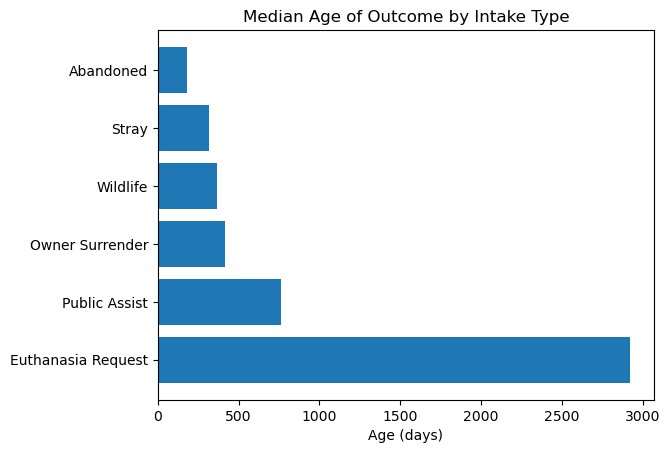

In [55]:
age_series = by_intake['Age at Outcome'].sort_values(ascending=False)
# x will be the series index, height will be the series values:
fig, ax = plt.subplots()
ax.barh( age_series.index, age_series.values)
ax.set_xlabel('Age (days)')
ax.set_title('Median Age of Outcome by Intake Type')
plt.show()

- The median age at which animals are at the shelter for euthanasia requests is considerably higher than any other intake type. That's sensible.
- We can also see that the median age for strays and abandoned animals are ~ 1 year and lower. The abandoned animal median age tells us that statistically this group are puppies/kittens/etc. Sad but also sensible.

13. Going a bit more granular, let us look at the breakdown of the subset by intake type and intake condition. Here is where grouping by both categoricals and conducting a count aggregation can come in handy. The count aggregation will give us the count of non-null values in the various columns grouped by intake type and intake condition.

In [66]:
counts_type_condition = subset_df.groupby(['Intake Type', 'Intake Condition']).count()
# just selecting two intake types to view resulting dataframe
counts_type_condition.loc[["Abandoned", "Euthanasia Request"]]

Animal ID  Animal Type  Breed  \
Intake Type        Intake Condition                                  
Abandoned          Injured                   9            9      9   
                   Medical                   9            9      9   
                   Neonatal                 17           17     17   
                   Normal                  496          496    496   
                   Nursing                  83           83     83   
                   Sick                     26           26     26   
                   Space                     4            4      4   
Euthanasia Request Aged                     41           41     41   
                   Injured                  21           21     21   
                   Med Urgent                1            1      1   
                   Normal                   80           80     80   
                   Other                     2            2      2   
                   Sick                    102          102    102   

                                     Sex upon Intake  Sex upon Outcome  \
Intake Type        Intake Condition                                      
Abandoned          Injured                         9                 9   
                   Medical                         9                 9   
                   Neonatal                       17                17   
                   Normal                        496               496   
                   Nursing                        83                83   
                   Sick                           26                26   
                   Space                           4                 4   
Euthanasia Request Aged                           41                41   
                   Injured                        21                21   
                   Med Urgent                      1                 1   
                   Normal                         80                80   
                   Other                           2                 2   
                   Sick                          102               102   

                                     Outcome Type  Age at Outcome  \
Intake Type        Intake Condition                                 
Abandoned          Injured                      9               9   
                   Medical                      9               9   
                   Neonatal                    17              17   
                   Normal                     496             496   
                   Nursing                     83              83   
                   Sick                        26              26   
                   Space                        4               4   
Euthanasia Request Aged                        41              41   
                   Injured                     21              21   
                   Med Urgent                   1               1   
                   Normal                      80              80   
                   Other                        2               2   
                   Sick                       102             102   

                                     Duration of Stay  
Intake Type        Intake Condition                    
Abandoned          Injured                          9  
                   Medical                          9  
                   Neonatal                        17  
                   Normal                         496  
                   Nursing                         83  
                   Sick                            26  
                   Space                            4  
Euthanasia Request Aged                            41  
                   Injured                         21  
                   Med Urgent                       1  
                   Normal                          80  
                   Other                            2  
                   Sick                           102

We have a DataFrame multi-indexed on intake type and conditon with the non-null counts contained within each subcategory for every column. Since we took care of all the NaNs, the counts will be the same on all the columns.

14. Select just the 'Animal ID' column renaming it to 'Counts':

In [77]:
counts = counts_type_condition.rename(columns = {'Animal ID': 'Counts'})["Counts"]]

# just selecting two intake types to view structure of result
counts.loc[["Abandoned", "Euthanasia Request"]]

Intake Type         Intake Condition
Abandoned           Injured               9
                    Medical               9
                    Neonatal             17
                    Normal              496
                    Nursing              83
                    Sick                 26
                    Space                 4
Euthanasia Request  Aged                 41
                    Injured              21
                    Med Urgent            1
                    Normal               80
                    Other                 2
                    Sick                102
Name: Counts, dtype: int64

Immediately, we can see that there are condition subcategories in 'Abandoned' that don't exist in 'Euthanasia Request' and vice-versa:
- 'Nursing', 'Neonatal' are subcategories indicating in 'Abandoned' explicitly showing us there are many very young animals in this intake type.
- 'Euthanasia Request' has a category called 'Aged' that doesn't exist in 'Abandoned'. There are many old animals in this intake type.

This fits well together with what we found for the median age across the different intake types. There is also a much higher percentage of sick animals in 'Euthanasia Request' than in 'Abandoned'. Again, this is quite plausible.

15. a. The count data is in **long** format. If we wanted, We could convert this to a **wide** format by *unstacking* the multi-index. Unstack  'Intake Condition' so that it becomes the columns of a new DataFrame:

In [80]:
counts.unstack('Intake Condition')

Intake Condition,Aged,Behavior,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Normal,Nursing,Other,Panleuk,Pregnant,Sick,Space
Intake Type,,,,,,,,,,,,,,,
Abandoned,NaN,NaN,NaN,9.0,NaN,NaN,9.0,17.0,496.0,83.0,NaN,NaN,NaN,26.0,4.0
Euthanasia Request,41.0,NaN,NaN,21.0,NaN,1.0,NaN,NaN,80.0,NaN,2.0,NaN,NaN,102.0,NaN
Owner Surrender,90.0,10.0,9.0,508.0,2.0,NaN,23.0,26.0,20796.0,320.0,39.0,1.0,16.0,893.0,NaN
Public Assist,35.0,12.0,3.0,165.0,NaN,NaN,11.0,7.0,6256.0,120.0,43.0,NaN,6.0,184.0,NaN
Stray,258.0,14.0,108.0,5590.0,1.0,1.0,107.0,145.0,73275.0,3295.0,141.0,NaN,74.0,3010.0,NaN
Wildlife,1.0,NaN,1.0,939.0,NaN,NaN,2.0,1.0,2810.0,57.0,4.0,NaN,NaN,1452.0,NaN


One benefit of this representation is that it is more compact. We can view all the data easily whereas this proves difficult in the long format. A downside is that it produce NaNs when the subcategories (intake conditions) are not the same across the different main categories (intake type).

15. b. In this case, since we have count data, we are fortunate. We can actually just impute the NaNs with zero. Let's do it.

In [81]:
counts.unstack('Intake Condition').fillna(0)

Intake Condition,Aged,Behavior,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Normal,Nursing,Other,Panleuk,Pregnant,Sick,Space
Intake Type,,,,,,,,,,,,,,,
Abandoned,0.0,0.0,0.0,9.0,0.0,0.0,9.0,17.0,496.0,83.0,0.0,0.0,0.0,26.0,4.0
Euthanasia Request,41.0,0.0,0.0,21.0,0.0,1.0,0.0,0.0,80.0,0.0,2.0,0.0,0.0,102.0,0.0
Owner Surrender,90.0,10.0,9.0,508.0,2.0,0.0,23.0,26.0,20796.0,320.0,39.0,1.0,16.0,893.0,0.0
Public Assist,35.0,12.0,3.0,165.0,0.0,0.0,11.0,7.0,6256.0,120.0,43.0,0.0,6.0,184.0,0.0
Stray,258.0,14.0,108.0,5590.0,1.0,1.0,107.0,145.0,73275.0,3295.0,141.0,0.0,74.0,3010.0,0.0
Wildlife,1.0,0.0,1.0,939.0,0.0,0.0,2.0,1.0,2810.0,57.0,4.0,0.0,0.0,1452.0,0.0


16. Alternatively, if we wanted this wide format from the beginning, we could have just pivot tabled our previous `subset_df` on 'Intake Type' and 'Intake Condition' while count aggregating 'Age at Outcome':

In [89]:
# viewing subset_df head
subset_df.head(2)

,Animal ID,Animal Type,Breed,Intake Type,Intake Condition,Sex upon Intake,Sex upon Outcome,Outcome Type,Age at Outcome,Duration of Stay
0,A786884,Dog,Beagle Mix,Stray,Normal,Neutered Male,Neutered Male,Transfer,735,4
1,A706918,Dog,English Springer Spaniel,Stray,Normal,Spayed Female,Spayed Female,Return to Owner,2922,0


In [88]:
# pivot tabling: values of Age at Outcome for given Intake Type and Intake condition -- needs to be aggregated over
pivot_tabled = subset_df.pivot_table(index = 'Intake Type', columns= 'Intake Condition', values='Age at Outcome', aggfunc = 'count')
pivot_tabled = pivot_tabled.fillna(0) # filling NaNs
pivot_tabled

Intake Condition,Aged,Behavior,Feral,Injured,Med Attn,Med Urgent,Medical,Neonatal,Normal,Nursing,Other,Panleuk,Pregnant,Sick,Space
Intake Type,,,,,,,,,,,,,,,
Abandoned,0.0,0.0,0.0,9.0,0.0,0.0,9.0,17.0,496.0,83.0,0.0,0.0,0.0,26.0,4.0
Euthanasia Request,41.0,0.0,0.0,21.0,0.0,1.0,0.0,0.0,80.0,0.0,2.0,0.0,0.0,102.0,0.0
Owner Surrender,90.0,10.0,9.0,508.0,2.0,0.0,23.0,26.0,20796.0,320.0,39.0,1.0,16.0,893.0,0.0
Public Assist,35.0,12.0,3.0,165.0,0.0,0.0,11.0,7.0,6256.0,120.0,43.0,0.0,6.0,184.0,0.0
Stray,258.0,14.0,108.0,5590.0,1.0,1.0,107.0,145.0,73275.0,3295.0,141.0,0.0,74.0,3010.0,0.0
Wildlife,1.0,0.0,1.0,939.0,0.0,0.0,2.0,1.0,2810.0,57.0,4.0,0.0,0.0,1452.0,0.0


17. Now, let's calculate the median duration of stay and animal age at outcome grouped by Intake Type and Intake Condition. We will then join this information to our count aggregation. First, we conduct the groupby/aggregation and save it to `median_calc`:

In [105]:
median_calc = subset_df.groupby(['Intake Type', 'Intake Condition']).median(numeric_only=True)
median_calc.loc[["Abandoned", "Euthanasia Request"]] # just getting the elements for "Abandoned", "Euthanasia Request" to view

Age at Outcome  Duration of Stay
Intake Type        Intake Condition                                  
Abandoned          Injured                    759.0               9.0
                   Medical                    390.0               7.0
                   Neonatal                    23.0               0.0
                   Normal                     284.0               8.0
                   Nursing                     20.0               0.0
                   Sick                        74.5               4.0
                   Space                       28.5               0.0
Euthanasia Request Aged                      5113.0               0.0
                   Injured                    753.0               0.0
                   Med Urgent                4748.0               0.0
                   Normal                    1933.5               0.0
                   Other                     1851.5               0.0
                   Sick                      2923.5               0.0

18. Notice that this has the same row structures as counts. To combine `median_calc` and `counts` we just can concatenate along `axis = 1`(columns).

In [109]:
concat_aggregates = pd.concat([median_calc, counts], axis = 1)
concat_aggregates.loc[["Abandoned", "Euthanasia Request"]] # just getting the elements for "Abandoned", "Euthanasia Request" to view structure of results

Age at Outcome  Duration of Stay  Counts
Intake Type        Intake Condition                                          
Abandoned          Injured                    759.0               9.0       9
                   Medical                    390.0               7.0       9
                   Neonatal                    23.0               0.0      17
                   Normal                     284.0               8.0     496
                   Nursing                     20.0               0.0      83
                   Sick                        74.5               4.0      26
                   Space                       28.5               0.0       4
Euthanasia Request Aged                      5113.0               0.0      41
                   Injured                    753.0               0.0      21
                   Med Urgent                4748.0               0.0       1
                   Normal                    1933.5               0.0      80
                   Other                     1851.5               0.0       2
                   Sick                      2923.5               0.0     102

By cleaning and joining relevant datasets together, and using reshaping and groupbys -- we now have a table that explicitly presents key statistical information across intake type and condition. Subsequent steps might involve visualization, further mathematic analysis, and even getting even more granular (looking at the distribution and median statistics across different animal types as well). 

As we can see Pandas joining, grouping, and reshaping functionalities are very powerful and make complicated operations quite easy to perform. You'll get to see this for yourself in the practice.